In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score

%matplotlib inline

In [2]:
df = pd.read_csv('framingham.csv')

In [3]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
df.shape

(4240, 16)

In [5]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [6]:
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

<AxesSubplot:>

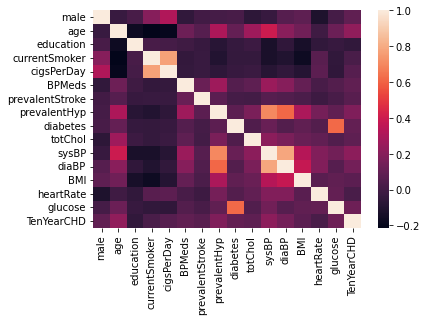

In [7]:
df_corr = df.corr()
sns.heatmap(df_corr)

In [8]:
df = df.drop('education',axis = 1)

In [9]:
df.shape

(4240, 15)

In [10]:
df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

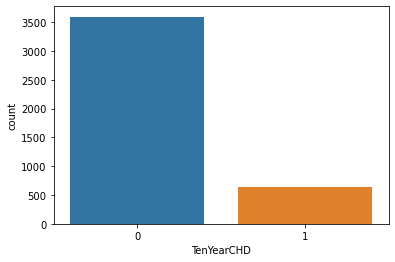

In [11]:
sns.countplot(x = 'TenYearCHD', data = df)

In [12]:
df.value_counts('TenYearCHD')

TenYearCHD
0    3596
1     644
dtype: int64

In [13]:
df = df.dropna()
df.isna().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

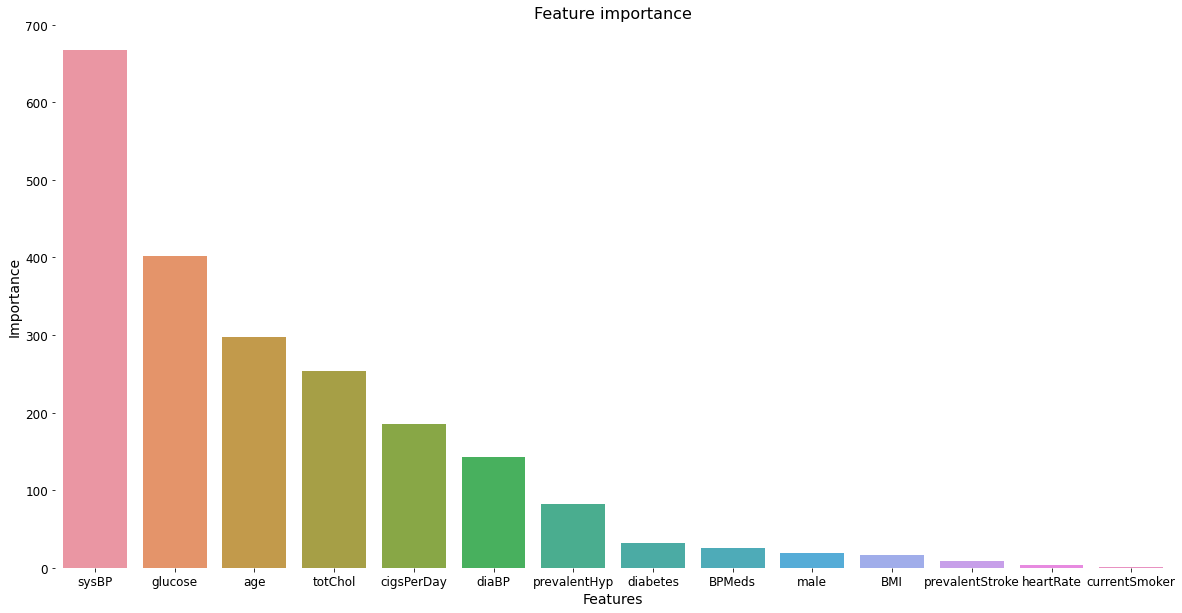

In [14]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = df.iloc[:,0:14]  #independent columns
y = df.iloc[:,-1]    #target column i.e TenYearCHD

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']
featureScores = featureScores.sort_values(by='Score', ascending=False)

plt.figure(figsize=(20,10))
sns.barplot(x='Features', y='Score', data=featureScores)
plt.box(False)
plt.title('Feature importance', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [15]:
features_list = featureScores["Features"].tolist()[:10]
features_list

['sysBP',
 'glucose',
 'age',
 'totChol',
 'cigsPerDay',
 'diaBP',
 'prevalentHyp',
 'diabetes',
 'BPMeds',
 'male']

<AxesSubplot:>

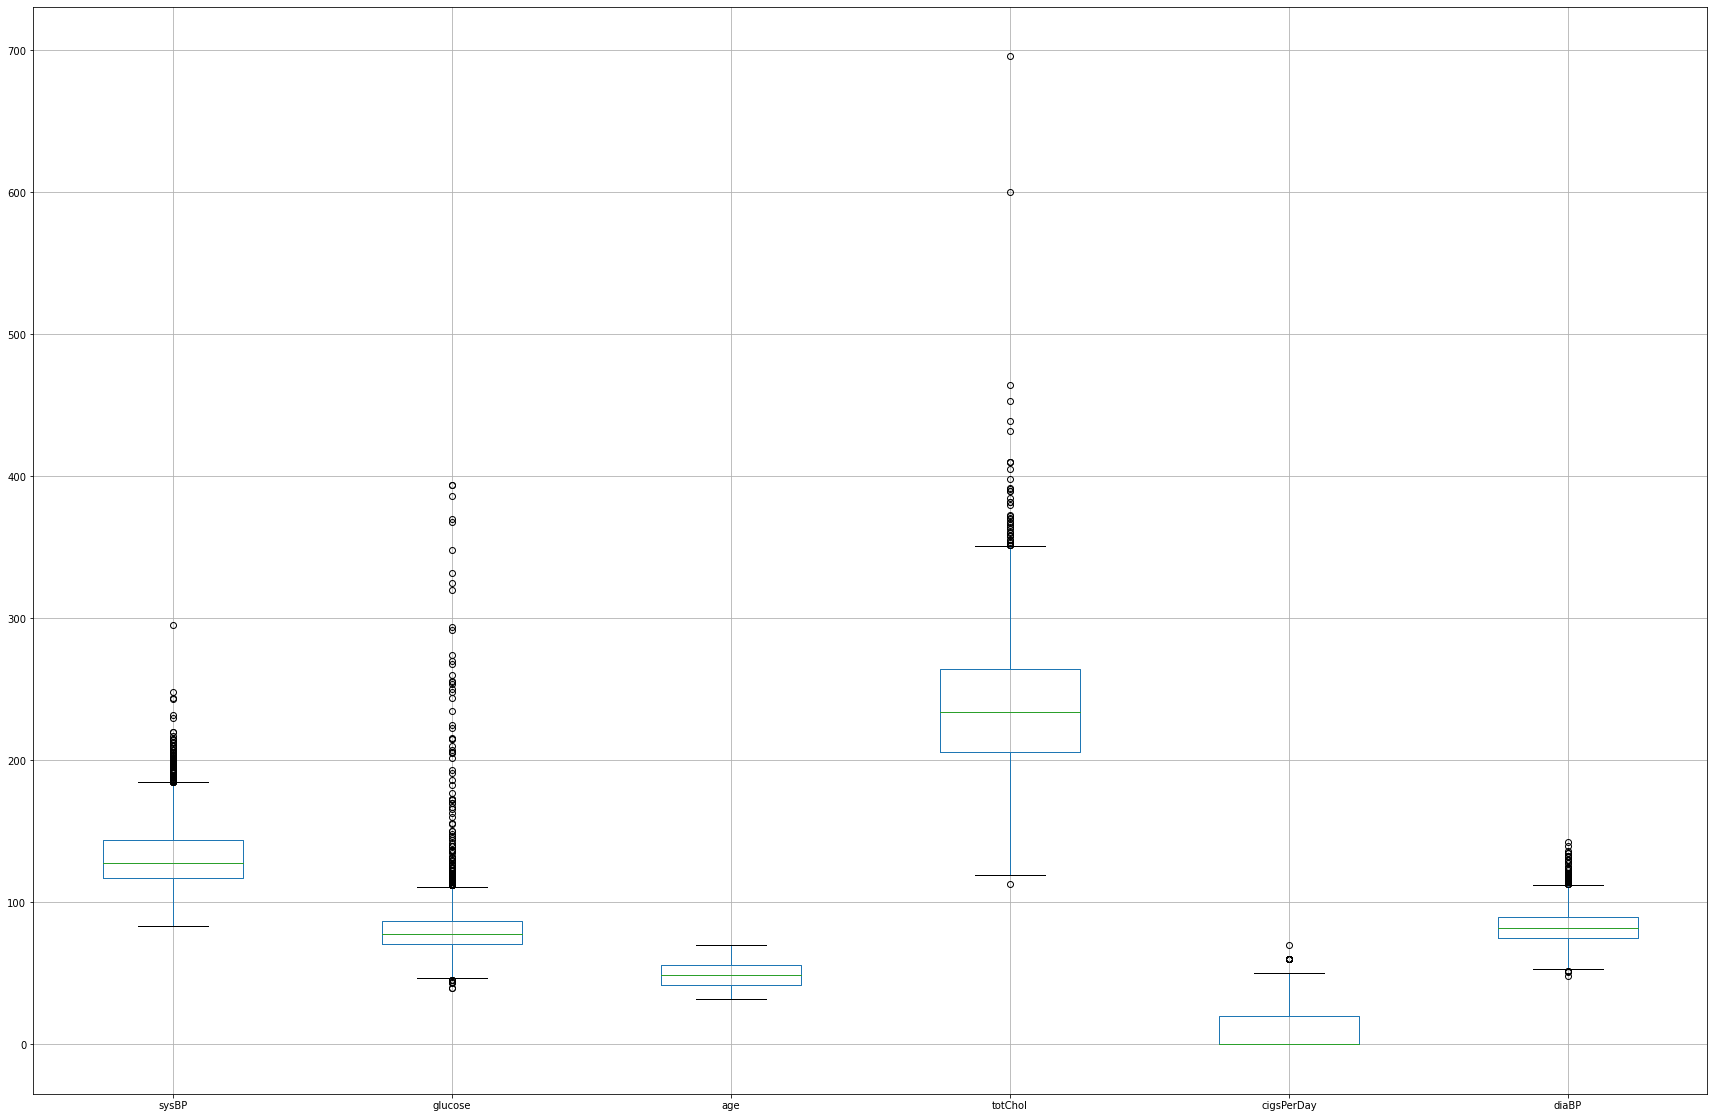

In [17]:
df.boxplot(column=['sysBP',
 'glucose',
 'age',
 'totChol',
 'cigsPerDay',
 'diaBP',], figsize=(30,20))

<AxesSubplot:xlabel='totChol'>

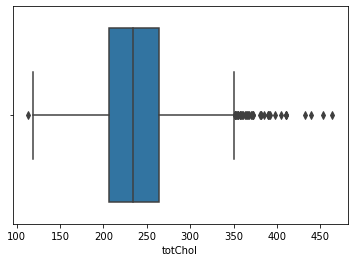

In [109]:
df = df.drop(df[df.totChol > 599].index)
sns.boxplot(x = 'totChol', data = df)

In [19]:
df_clean = df

In [20]:
df_clean.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [53]:
df_clean['TenYearCHD'].value_counts()

0    3179
1     572
Name: TenYearCHD, dtype: int64

In [54]:
df_clean[(df_clean['TenYearCHD'] == 0)].sample(1300)

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
921,0,56,0,0.0,0.0,0,0,0,298.0,115.0,80.0,31.11,75.0,77.0,0
1664,0,53,0,0.0,0.0,0,0,0,246.0,115.0,61.0,25.96,80.0,60.0,0
3840,0,49,1,15.0,0.0,0,0,0,267.0,107.0,74.0,27.80,65.0,75.0,0
4135,0,42,0,0.0,0.0,0,0,0,179.0,115.0,78.0,25.75,80.0,77.0,0
788,0,56,0,0.0,0.0,0,0,0,207.0,133.0,76.0,23.42,62.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3344,1,47,1,30.0,0.0,0,1,0,190.0,147.5,92.5,31.31,77.0,82.0,0
2783,0,62,0,0.0,0.0,0,0,0,281.0,126.0,85.5,23.29,65.0,63.0,0
3595,0,58,1,10.0,0.0,0,1,0,252.0,135.0,84.0,28.24,85.0,79.0,0
3857,0,46,0,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0


In [96]:
df_sampled = pd.concat([df_clean[(df_clean['TenYearCHD'] == 0)].sample(700),df_clean[(df_clean['TenYearCHD'] == 1)]])

In [97]:
df_sampled["TenYearCHD"].value_counts()

0    700
1    572
Name: TenYearCHD, dtype: int64

In [98]:
df_sampled.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1289,0,60,0,0.0,0.0,0,0,0,238.0,140.0,85.0,28.41,80.0,88.0,0
3673,1,48,1,60.0,0.0,0,0,0,232.0,136.0,81.0,25.83,80.0,78.0,0
1242,1,45,0,0.0,0.0,0,0,0,172.0,119.0,84.0,28.25,58.0,98.0,0
3711,1,49,1,3.0,0.0,0,1,0,246.0,141.0,92.0,27.92,75.0,76.0,0
402,0,41,0,0.0,0.0,0,0,0,277.0,113.5,75.0,29.73,63.0,90.0,0


In [133]:
y = df_sampled['TenYearCHD']
X = df_sampled.drop(['TenYearCHD'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state=16)

In [134]:
scaler = StandardScaler() 
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [135]:
log_reg = LogisticRegression()
log_reg.fit(scaled_X_train,y_train)

LogisticRegression()

In [136]:
coeffs = log_reg.coef_
Bo = log_reg.intercept_
print('B1 = ',coeffs[0][0])
print('B2 = ',coeffs[0][1])
print('B0 = ',Bo[0])

B1 =  0.2632269076134201
B2 =  0.6154379029347179
B0 =  -0.21818303796269567


In [137]:
y_pred = log_reg.predict(scaled_X_test)
y_pred

array([1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0], dtype=int64)

In [138]:
accuracy_score(y_test,y_pred)

0.6701570680628273

In [139]:
confusion_matrix(y_test,y_pred)

array([[81, 29],
       [34, 47]], dtype=int64)

C:\Users\Shubhodeep\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


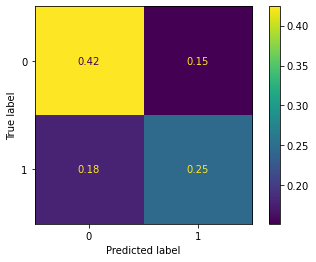

In [140]:
plot_confusion_matrix(log_reg,scaled_X_test,y_test,normalize='all')

C:\Users\Shubhodeep\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


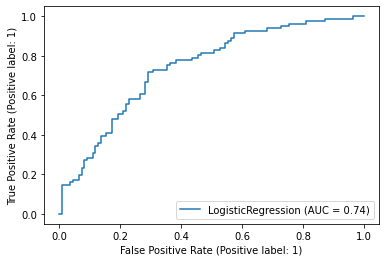

In [141]:
plot_roc_curve(log_reg,scaled_X_test,y_test)

In [142]:
f1_score(y_test,y_pred)

0.5987261146496815

In [143]:
len(y_train)

1081